In [2]:
#importing libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
# Converting raw data into dataframe
data=pd.read_csv('raw file.txt')
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [49]:
data.mean()

Hours      5.012
Scores    51.480
dtype: float64

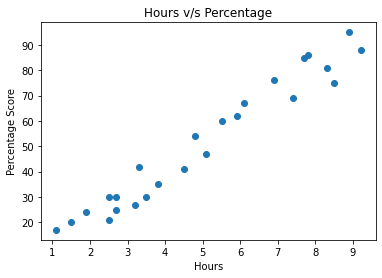

In [23]:
# Plotting the distribution of Scores
plt.scatter(x=data.Hours,y=data.Scores)
plt.title("Hours v/s Percentage")
plt.xlabel("Hours")
plt.ylabel("Percentage Score")
plt.show()

In [13]:
# We are using 20 percent data for testing
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [28]:
print("shape of X Train",X_train.shape)
print("shape of Y Train",y_train.shape)
print("shape of X Test", X_test.shape)
print("shape of Y Test",y_test.shape)

shape of X Train (20, 1)
shape of Y Train (20,)
shape of X Test (5, 1)
shape of Y Test (5,)


In [14]:
# Training the algorithm 
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [31]:
regressor.coef_

array([9.91065648])

In [33]:
regressor.intercept_

2.018160041434662

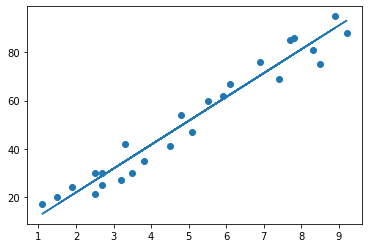

In [35]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [37]:
# Predicted the X-test using X-train
y_pred=regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [39]:
#Comapring the original and the predicted scores
pd.DataFrame(np.c_[X_test,y_test,y_pred], columns=["study_hours","student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,1.5,20.0,16.884145
1,3.2,27.0,33.732261
2,7.4,69.0,75.357018
3,2.5,30.0,26.794801
4,5.9,62.0,60.491033


In [41]:
regressor.score(X_test,y_test) 

0.9454906892105354

In [46]:
import joblib
joblib.dump(regressor,"Student_Marks_Predictor.pkl")

['Student_Marks_Predictor.pkl']

In [47]:
model=joblib.load("Student_Marks_Predictor.pkl")

In [48]:
#Presenting the solution i.e., if the student studies for 5 hrs. percentage scored is 51.6
model.predict([[5]])

array([51.57144244])